# **Import Python Modules**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# **Load Dataset:** *Cleaned-Survey-Pizza.csv*

In [2]:
raw_data = pd.read_csv("../data/Cleaned-Survey-Pizza.csv")
df = raw_data.copy()
df.head()

,Gender,Ham,Pineapple,Mushroom,Pepperoni,Chicken,Extra_Cheese,BBQ_Sauce,Pizza_Rating
0,1,0,0,0,0,0,0,1,1
1,1,1,0,0,1,0,0,1,1
2,1,1,0,0,1,0,0,1,1
3,1,0,0,1,0,1,0,0,0
4,1,1,0,1,0,1,0,1,0


# **Dataset Manipulation**

### Define ***function*** for Gender, Toppings and Rating Comparison:

In [3]:
def genderToppingsRatingsComparison(array):
  fc1, fc0, mc1, mc0 = 0, 0, 0, 0     # Create variable gender good and not good rate
  for gen, top, rate in array:
    if gen == 0:                      # Check if gender is female
      if top == 1 and rate == 1:      # Check if toppings and ratings is equal to 1
        fc1 += 1
      else:
        fc0 += 1
    if gen == 1:                      # Check if gender is male
      if top == 1 and rate == 1:      # Check if toppings and ratings is equal to 1
        mc1 +=1
      else:
        mc0 += 1
  return [fc1, fc0, mc1, mc0]         # Return the updated values of the variables in a list.

### Compare Columns: **"Gender", "Ham" and "Pizza_Rating"**

In [4]:
array_gender_ham = df[["Gender", "Ham", "Pizza_Rating"]].to_numpy()   # Create an array.
list_ham = genderToppingsRatingsComparison(array_gender_ham)          # Pass the array as an argument to the function.
list_ham

[10, 10, 17, 83]

### Compare Columns: **"Gender", "Pineapple" and "Pizza_Rating"**


In [5]:
array_gender_pin = df[["Gender", "Pineapple", "Pizza_Rating"]].to_numpy()   # Create an array.
list_pin = genderToppingsRatingsComparison(array_gender_pin)                # Pass the array as an argument to the function.
list_pin

[9, 11, 14, 86]

### Compare Columns: **"Gender", "Mushroom" and "Pizza_Rating"**

In [6]:
array_gender_mus = df[["Gender", "Mushroom", "Pizza_Rating"]].to_numpy()    # Create an array.
list_mus = genderToppingsRatingsComparison(array_gender_mus)                # Pass the array as an argument to the function.
list_mus

[0, 20, 0, 100]

### Compare Columns: **"Gender", "Pepperoni" and "Pizza_Rating"**

In [7]:
array_gender_pep = df[["Gender", "Pepperoni", "Pizza_Rating"]].to_numpy()   # Create an array.
list_pep = genderToppingsRatingsComparison(array_gender_pep)                # Pass the array as an argument to the function.
list_pep

[5, 15, 17, 83]

### Compare Columns: **"Gender", "Chicken" and "Pizza_Rating"**

In [8]:
array_gender_chi = df[["Gender", "Chicken", "Pizza_Rating"]].to_numpy()   # Create an array.
list_chi = genderToppingsRatingsComparison(array_gender_chi)              # Pass the array as an argument to the function.
list_chi

[8, 12, 18, 82]

### Compare Columns: **"Gender", "Extra_Cheese" and "Pizza_Rating"**

In [9]:
array_gender_xch = df[["Gender", "Extra_Cheese", "Pizza_Rating"]].to_numpy()    # Create an array.
list_xch = genderToppingsRatingsComparison(array_gender_xch)                    # Pass the array as an argument to the function.
list_xch

[5, 15, 15, 85]

### Compare Columns: **"Gender", "BBQ_Sauce" and "Pizza_Rating"**

In [10]:
array_gender_bbq = df[["Gender", "BBQ_Sauce", "Pizza_Rating"]].to_numpy()   # Create an array.
list_bbq = genderToppingsRatingsComparison(array_gender_bbq)                # Pass the array as an argument to the function.
list_bbq

[7, 13, 21, 79]

# **Create New DataFrame**

In [11]:
list_gen = ["FEMALE", "FEMALE", "MALE", "MALE"]
list_rte = ["GOOD", "NOT GOOD", "GOOD", "NOT GOOD"]
list_idx = ["GENDER", "HAM", "PINEAPPLE", "MUSHROOM","PEPPERONI", "CHICKEN", "EXTRA CHEESE", "BBQ SAUCE", "RATING"]
df_new = pd.DataFrame([list_gen, list_ham, list_pin, list_mus, list_pep, list_chi, list_xch, list_bbq, list_rte], index=list_idx).T
df_new

,GENDER,HAM,PINEAPPLE,MUSHROOM,PEPPERONI,CHICKEN,EXTRA CHEESE,BBQ SAUCE,RATING
0,FEMALE,10,9,0,5,8,5,7,GOOD
1,FEMALE,10,11,20,15,12,15,13,NOT GOOD
2,MALE,17,14,0,17,18,15,21,GOOD
3,MALE,83,86,100,83,82,85,79,NOT GOOD


# **Visualization**

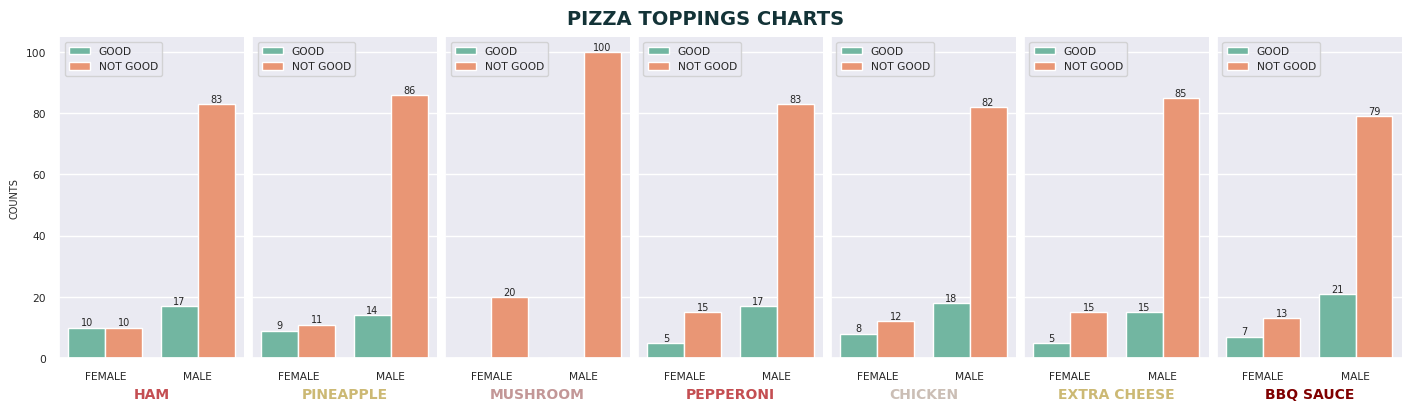

In [12]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="darkgrid", palette="Set2", font="sans-serif", font_scale=.7, color_codes=True, rc=custom_params)

fig, axs = plt.subplots(1, 7, figsize=(14, 4), sharex=False, sharey=True, layout="constrained")

# figure 1: HAM
axs0 = sns.barplot(data=df_new, x="GENDER", y="HAM", hue="RATING", ax=axs[0])

for i in axs0.containers:
  labels = [int(a) if a else "" for a in i.datavalues]
  axs0.bar_label(i, labels=labels, fontsize=7)

axs0.set_xlabel("HAM", fontsize=10, fontweight="bold", color="r")
axs0.set_ylabel("COUNTS", fontsize=7, fontweight=None)
axs0.legend(loc="upper left")

# figure 2:PINEAPPLE
axs1 = sns.barplot(data=df_new, x="GENDER", y="PINEAPPLE", hue="RATING", ax=axs[1])

for i in axs1.containers:
  labels = [int(a) if a else "" for a in i.datavalues]
  axs1.bar_label(i, labels=labels, fontsize=7)

axs1.set_xlabel("PINEAPPLE", fontsize=10, fontweight="bold", color="y")
axs1.legend(loc="upper left")

# figure 3:MUSHROOM
axs2 = sns.barplot(data=df_new, x="GENDER", y="MUSHROOM", hue="RATING", ax=axs[2])

for i in axs2.containers:
  labels = [int(a) if a else "" for a in i.datavalues]
  axs2.bar_label(i, labels=labels, fontsize=7)

axs2.set_xlabel("MUSHROOM", fontsize=10, fontweight="bold", color="#c39797")
axs2.legend(loc="upper left")

# figure 4: PEPPERONI
axs3 = sns.barplot(data=df_new, x="GENDER", y="PEPPERONI", hue="RATING", ax=axs[3])

for i in axs3.containers:
  labels = [int(a) if a else "" for a in i.datavalues]
  axs3.bar_label(i, labels=labels, fontsize=7)

axs3.set_xlabel("PEPPERONI", fontsize=10, fontweight="bold", color="r")
axs3.legend(loc="upper left")

# figure 5: CHICKEN
axs4 = sns.barplot(data=df_new, x="GENDER", y="CHICKEN", hue="RATING", ax=axs[4])

for i in axs4.containers:
  labels = [int(a) if a else "" for a in i.datavalues]
  axs4.bar_label(i, labels=labels, fontsize=7)

axs4.set_xlabel("CHICKEN", fontsize=10, fontweight="bold", color="#cbbeb5")
axs4.legend(loc="upper left")

# figure 6: EXTRA CHEESE
axs5 = sns.barplot(data=df_new, x="GENDER", y="EXTRA CHEESE", hue="RATING", ax=axs[5])

for i in axs5.containers:
  labels = [int(a) if a else "" for a in i.datavalues]
  axs5.bar_label(i, labels=labels, fontsize=7)

axs5.set_xlabel("EXTRA CHEESE", fontsize=10, fontweight="bold", color="y")
axs5.legend(loc="upper left")

# figure 7: BBQ SAUCE
axs6 = sns.barplot(data=df_new, x="GENDER", y="BBQ SAUCE", hue="RATING", ax=axs[6])

for i in axs6.containers:
  labels = [int(a) if a else "" for a in i.datavalues]
  axs6.bar_label(i, labels=labels, fontsize=7)

axs6.set_xlabel("BBQ SAUCE", fontsize=10, fontweight="bold", color="#800000")
axs6.legend(loc="upper left")

fig.suptitle("PIZZA TOPPINGS CHARTS", fontsize=14, fontweight="bold", color="#133337")

plt.show()